In [1]:
import sys
import os

# Add the root directory to the Python environment
root_dir = os.path.abspath(os.path.join(os.getcwd(), ".."))
sys.path.append(root_dir)

In [2]:
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [23]:
# Read the CSV file
df = pd.read_csv("../data/stats/stats_20250710_224334.csv")

# Display basic information about the dataframe
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")
print("\nFirst few rows:")
df.head()


Shape: (1200000, 7)
Columns: ['block_number', 'top_coins', 'num_nodes', 'num_edges', 'max_degree', 'mean_degree', 'treewidth']

First few rows:


,block_number,top_coins,num_nodes,num_edges,max_degree,mean_degree,treewidth
0,22820000,5000,5000.0,15846.0,9276.0,6.34,32
1,22820000,5000,NaN,NaN,NaN,NaN,32
2,22820000,10000,10000.0,27062.0,18996.0,5.41,38
3,22820000,10000,NaN,NaN,NaN,NaN,38
4,22820000,15000,15000.0,37596.0,28852.0,5.01,41


In [24]:
# Filter the dataframe to only include blocks in the range 22820000 to 22821000 (inclusive)
df = df[(df['block_number'] >= 22820000) & (df['block_number'] <= 22840000)]

In [37]:
df_2 = pd.read_csv("../data/stats/stats_20250715_033738.csv")

df_2.head()

,block_number,top_coins,num_nodes,num_edges,max_degree,mean_degree,treewidth
0,22820000,100,100.0,606.0,150.0,12.12,8
1,22820000,100,NaN,NaN,NaN,NaN,8
2,22820000,1000,1000.0,4414.0,1762.0,8.83,18
3,22820000,1000,NaN,NaN,NaN,NaN,18
4,22820001,100,100.0,606.0,150.0,12.12,8


In [39]:
df_3 = pd.concat([df, df_2])
print('treewidth max: ', df_3['treewidth'].max())
print('treewidth min: ', df_3['treewidth'].min())
print('treewidth mean: ', df_3['treewidth'].mean())
print('----------------------------------------')
print("Lasr few rows:")
print(df_3.tail(3))
print('----------------------------------------')
# Find maximum treewidth information
max_treewidth = df_3['treewidth'].max()
print(f'Maximum treewidth: {max_treewidth}')

# Find the row(s) with maximum treewidth
max_treewidth_rows = df_3[df_3['treewidth'] == max_treewidth]
print(max_treewidth_rows[['block_number', 'top_coins', 'treewidth', 'num_nodes', 'num_edges']])


treewidth max:  71
treewidth min:  8
treewidth mean:  54.68200763601654
----------------------------------------
Lasr few rows:
       block_number  top_coins  num_nodes  num_edges  max_degree  mean_degree  \
79997      22839999        100        NaN        NaN         NaN          NaN   
79998      22839999       1000     1000.0     4416.0      1762.0         8.83   
79999      22839999       1000        NaN        NaN         NaN          NaN   

       treewidth  
79997          8  
79998         18  
79999         18  
----------------------------------------
Maximum treewidth: 71
        block_number  top_coins  treewidth  num_nodes  num_edges
38          22820000     100000         71   100000.0   214320.0
39          22820000     100000         71        NaN        NaN
78          22820001     100000         71   100000.0   214320.0
79          22820001     100000         71        NaN        NaN
118         22820002     100000         71   100000.0   214320.0
...              .

In [26]:
print(df['block_number'].max())
print(df['block_number'].min())


22840000
22820000


In [27]:
# Calculate max and average treewidth for each block number
block_stats = df.groupby('block_number')['treewidth'].agg(['max', 'mean']).reset_index()
block_stats.columns = ['block_number', 'max_treewidth', 'avg_treewidth']

print("Block statistics summary:")
print(f"Number of blocks: {len(block_stats)}")
print(f"Block range: {block_stats['block_number'].min()} to {block_stats['block_number'].max()}")
print("\nFirst few rows:")
print(block_stats.head())


Block statistics summary:
Number of blocks: 20001
Block range: 22820000 to 22840000

First few rows:
   block_number  max_treewidth  avg_treewidth
0      22820000             71          58.85
1      22820001             71          58.85
2      22820002             71          58.85
3      22820003             71          58.85
4      22820004             71          58.85


In [28]:
print(block_stats['max_treewidth'].max())
print(block_stats['max_treewidth'].mean())

71
71.0


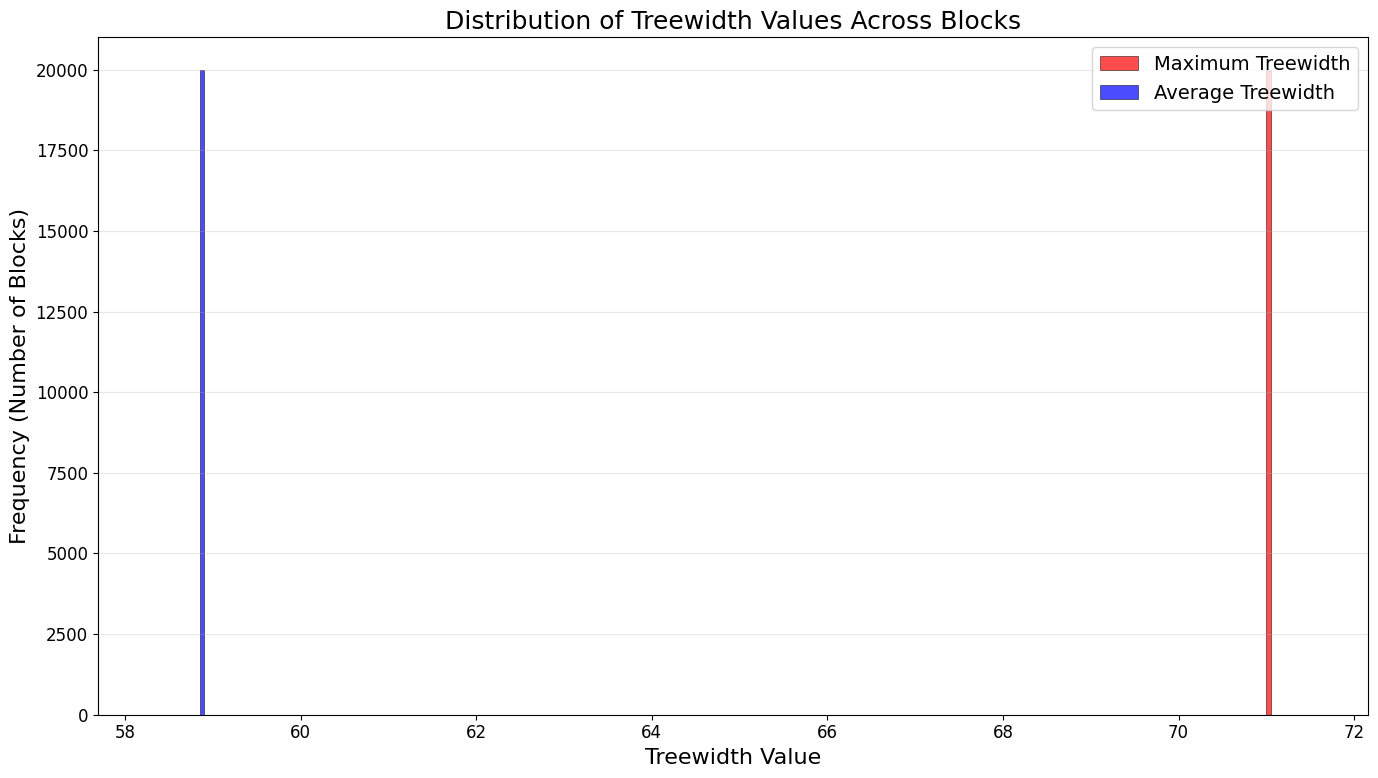

In [29]:

# Create histogram showing distribution of treewidth values
plt.figure(figsize=(14, 8))

# Increase font sizes  
plt.rcParams.update({'font.size': 14})

# Create histogram with both max and average treewidth distributions
plt.hist(block_stats['max_treewidth'], bins=20, alpha=0.7, color='red', 
         edgecolor='black', linewidth=0.5, label='Maximum Treewidth')
plt.hist(block_stats['avg_treewidth'], bins=20, alpha=0.7, color='blue', 
         edgecolor='black', linewidth=0.5, label='Average Treewidth')

# Set axis labels with larger font
plt.xlabel('Treewidth Value', fontsize=16)
plt.ylabel('Frequency (Number of Blocks)', fontsize=16)
plt.title('Distribution of Treewidth Values Across Blocks', fontsize=18)

# Format ticks
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add legend
plt.legend(fontsize=14, loc='upper right')

# Add grid for better readability
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

In [40]:
df = pd.concat([df, df_2])
# Calculate average treewidth for each top_coins number
avg_treewidth_by_top_coins = df.groupby('top_coins')['treewidth'].mean()

print("Average treewidth for each top_coins number:")
print(avg_treewidth_by_top_coins)

avg_treewidth_df = avg_treewidth_by_top_coins.reset_index()
avg_treewidth_df.columns = ['top_coins', 'avg_treewidth']
print("\nAs DataFrame:")
avg_treewidth_df

Average treewidth for each top_coins number:
top_coins
100        8.0
1000      18.0
5000      32.0
10000     38.0
15000     41.0
20000     44.0
25000     47.0
30000     49.0
35000     55.0
40000     58.0
45000     65.0
50000     64.0
55000     70.0
60000     63.0
65000     65.0
70000     68.0
75000     69.0
80000     70.0
85000     70.0
90000     69.0
95000     69.0
100000    71.0
Name: treewidth, dtype: float64

As DataFrame:


,top_coins,avg_treewidth
0,100,8.0
1,1000,18.0
2,5000,32.0
3,10000,38.0
4,15000,41.0
5,20000,44.0
6,25000,47.0
7,30000,49.0
8,35000,55.0
9,40000,58.0


In [ ]:

# Calculate total average of avg_treewidth
total_avg_treewidth = avg_treewidth_df[avg_treewidth_df['top_coins']==100000]['avg_treewidth'].mean()
total_avg_treewidth_10000 = avg_treewidth_df[avg_treewidth_df['top_coins']==10000]['avg_treewidth'].mean()
total_avg_treewidth_5000 = avg_treewidth_df[avg_treewidth_df['top_coins']==5000]['avg_treewidth'].mean()
total_avg_treewidth_1000 = avg_treewidth_df[avg_treewidth_df['top_coins']==1000]['avg_treewidth'].mean()
total_avg_treewidth_100 = avg_treewidth_df[avg_treewidth_df['top_coins']==100]['avg_treewidth'].mean()
print(f"Total average of avg_treewidth 100000: {total_avg_treewidth}")
print(f"Total average of avg_treewidth 10000: {total_avg_treewidth_10000}")
print(f"Total average of avg_treewidth 5000: {total_avg_treewidth_5000}")
print(f"Total average of avg_treewidth 1000: {total_avg_treewidth_1000}")
print(f"Total average of avg_treewidth 100: {total_avg_treewidth_100}")
print(f"Number of blocks: {len(avg_treewidth_df)}")

Total average of avg_treewidth: 71.0
Total average of avg_treewidth 10000: 38.0
Total average of avg_treewidth 5000: 32.0
Total average of avg_treewidth 1000: 18.0
Total average of avg_treewidth 100: 8.0
Number of blocks: 22


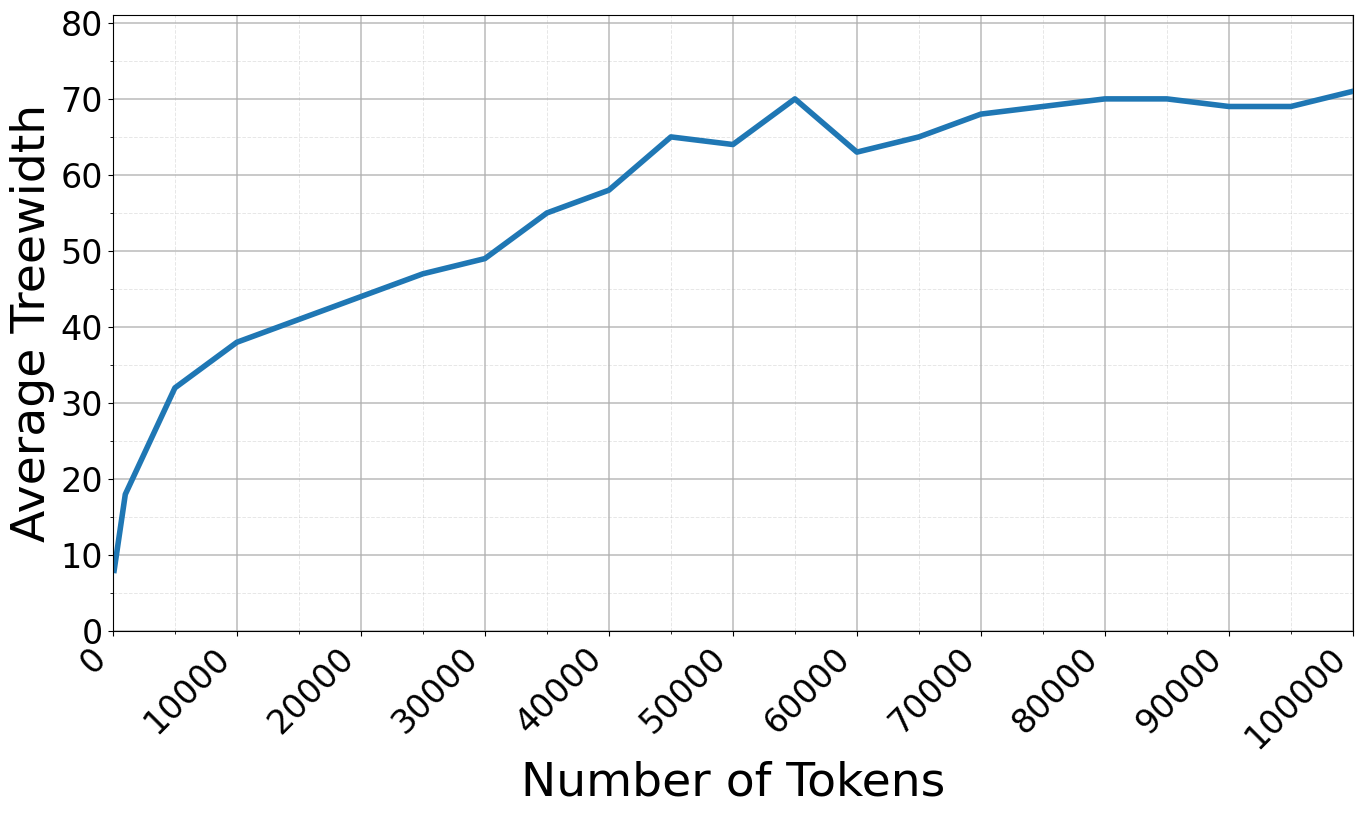

In [ ]:

import matplotlib.ticker as mticker

plt.figure(figsize=(16, 8))  # Larger figure for readability

plt.rcParams.update({'font.size': 38})

# Use a more visible, thicker line and add markers for each point
plt.plot(
    avg_treewidth_df['top_coins'],
    avg_treewidth_df['avg_treewidth'],
    linewidth=4,           # Thicker line
    markersize=8,
    label='Average Treewidth'
)

plt.xlabel('Number of Tokens', fontsize=34, fontweight='normal')
plt.ylabel('Average Treewidth', fontsize=34, fontweight='normal')
# plt.title('Average Treewidth vs Number of Tokens', fontsize=20, pad=16, fontweight='normal')

plt.xlim(0, 100000)
plt.ylim(0, avg_treewidth_df['avg_treewidth'].max() + 10)

# Use fewer, more spaced x-ticks for clarity
ax = plt.gca()
ax.xaxis.set_major_locator(mticker.MultipleLocator(10000))
ax.xaxis.set_minor_locator(mticker.MultipleLocator(5000))
ax.yaxis.set_major_locator(mticker.MultipleLocator(10))
ax.yaxis.set_minor_locator(mticker.MultipleLocator(5))

plt.xticks(fontsize=24, rotation=45, ha='right')  # Rotate x-axis labels 45 degrees
plt.yticks(fontsize=24)

# Add grid with different styles for major and minor ticks
plt.grid(True, which='major', axis='both', alpha=0.8, linewidth=1.2)
plt.grid(True, which='minor', axis='both', alpha=0.3, linewidth=0.7, linestyle='--')


# # Annotate points that are local maxima (max from their neighbours)
# for i in range(1, len(avg_treewidth_df) - 1):
#     prev_y = avg_treewidth_df['avg_treewidth'].iloc[i - 1]
#     curr_y = avg_treewidth_df['avg_treewidth'].iloc[i]
#     next_y = avg_treewidth_df['avg_treewidth'].iloc[i + 1]
#     if curr_y > prev_y and curr_y > next_y:
#         x = avg_treewidth_df['top_coins'].iloc[i]
#         y = curr_y
#         plt.annotate(f"{int(x)}", (x, y), textcoords="offset points", xytext=(0,8), ha='center', fontsize=13, color='gray')

# plt.tight_layout()
plt.savefig('../data/treewidth_vs_tokens.pdf', 
            dpi=500, 
            format='pdf', 
            bbox_inches='tight',
            facecolor='white',
            edgecolor='none')
plt.show()

